In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Keras fashion mnist dataset을 다운로드
* 5만개의 학습용, 1만개의 테스트용 grayscale image array를 다운로드

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# image size는 28x28의 grayscale 2차원 데이터
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

### MNIST image array 시각화

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

In [ ]:
train_images[0, :, :], train_labels[0]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])
        
show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)

### 데이터 전처리 수행. 
* 0 ~ 255 사이의 픽셀값을 0 ~ 1 사이 값으로 변환. 
* array type은 float 32

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)


In [ ]:
train_images[0]

### Dense Layer를 기반으로 모델을 생성

In [ ]:
INPUT_SIZE = 28

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

#케라스의 레이어(케라스가 쉽다고 말하는 이유이다)
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),  #28x28 입력이 들어오고 flatten에 의해 784개의 1열이 만들어진다.
    Dense(100, activation='relu'),   #Dense Layer 1번을 생성하고 뉴런 100개를 만든다.(78,400개의 가중치가 생김)
    Dense(30, activation='relu'),    #Dense Layer 2번을 생성하고 뉴런 30개를 만든다.(3,000개의 가중치)
    Dense(10, activation='softmax')  #
])

model.summary()


### 모델의 Loss와 Optimizer 설정하고 학습 수행
* loss는 categorical_crossentropy로, optimizer는 Adam으로 설정
* categorical_crossentropy면 타켓값(레이블)이 반드시 one hot encoding이 되어야한다.
* one hot encoding을 않쓰고 사용할거라면 sparse_categorical_crossentropy를 사용해야 한다.

원-핫 인코딩 (One-Hot Encoding)
원-핫 인코딩은 클래스 레이블을 벡터 형태로 변환합니다. 이 벡터는 해당 클래스의 위치만 1이고 나머지는 모두 0입니다. 예를 들어, 클래스가 3개일 때:
클래스 0: [1, 0, 0]
클래스 1: [0, 1, 0]
클래스 2: [0, 0, 1]
원-핫 인코딩을 사용하면 각 레이블이 벡터로 변환되므로 categorical_crossentropy 손실 함수를 사용할 수 있습니다.

스파스 인코딩 (Sparse Encoding)
스파스 인코딩에서는 클래스 레이블을 정수 형태로 표현합니다. 즉, 각 클래스는 단일 정수로 표시됩니다. 예를 들어, 클래스가 3개일 때:
클래스 0: 0
클래스 1: 1
클래스 2: 2
스파스 인코딩을 사용하면 각 레이블이 단일 정수로 표시되므로 sparse_categorical_crossentropy 손실 함수를 사용할 수 있습니다.




* categorical crossentropy를 위해서 Label을 OHE 로 변경

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)  #categorical_crossentropy이므로 반드시 one hot encoding
test_oh_labels = to_categorical(test_labels)    #categorical_crossentropy이므로 반드시 one hot encoding

print(train_oh_labels.shape, test_oh_labels.shape)

#one hot encoding을 했기 때문에 결과값이 (60000, 10) (10000, 10) 처럼 2차원으로 나오게 된다.

In [ ]:
train_images.shape

In [ ]:
#모델 학습 시작
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)
#모델 학습이 끝나면 history라는 객체를 통해 accuracy, loss를 반환한다.

In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])


### 테스트 데이터를 기반으로 Label 값 예측
* model.predict()를 이용하여 label값 예측
* predict()의 인자로 입력되는 feature array는 학습의 feature array와 shape가 동일해야함. 
* fit() 시 3차원(28x28 2차원 array가 여러개 존재) array 입력 했으므로 predict()도 동일한 3차원 데이터 입력
* 특히 한건만 predict() 할때도 3차원 데이터여야 함. 이를 위해 expand_dims()로 2차원 image 배열을 3차원으로 변경

In [ ]:
test_images.shape

In [ ]:
pred_proba[0]
#결과 :
#array([4.8651878e-09, 3.7216765e-09, 9.6669983e-10, 3.4128553e-07,
#      1.5375153e-09, 5.4103624e-05, 1.4692477e-08, 1.8135931e-03,
#      2.8841464e-06, 9.9812907e-01], dtype=float32)
#10개 중에 가장 높은 확률을 기록한 것은 9.9812907e-01이다.
#['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
pred_proba = model.predict(test_images) #test_images : 예측할 Image Array
print(pred_proba.shape)

In [ ]:
#케라스에서도 차원은 항상 일치를 시켜줘야한다.
test_images.shape
#결과 : (10000, 28, 28)

#이미지 1건만 입력해서 결과를 확인할 경우
test_images[0].shape
#결과 : (28, 28)
#2차원이므로 3차원 변경을 해줘야 한다.

np.expand_dims(test_images[0], axis=0).shape
#결과 : (1, 28, 28)
#맨앞에 차원을 하나 추가하려면 axis=0, 다음에 추가하려면 axis=1, 맨 뒤에 추가하려면 axis=-1

In [ ]:
np.expand_dims(test_images[0], axis=0).shape

In [ ]:
pred_proba = model.predict(np.expand_dims(test_images[0], axis=0)) #여기서 model은 학습이 된 모델을 뜻한다.
print('softmax output:', pred_proba)
pred = np.argmax(np.squeeze(pred_proba))  #위에서 차원을 강제로 하나 늘렸으니 np.squeeze를 써서 강제로 하나를 줄인다.
print('predicted class value:', pred)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print('target class value:', test_labels[0], 'predicted class value:', pred)

### 테스트 데이터 세트로 모델 성능 검증

In [ ]:
model.evaluate(test_images, test_oh_labels, batch_size=64)
#학습을 one hot encoding으로 했기 때문에 검증할 때도 one hot encoding된 것을(test_oh_labels) 넣어주어야 한다.

### 검증 데이터 세트를 이용하여 학습 수행. 
* 일반적으로 fit() 수행시 별도의 검증 데이터 세트를 이용하여 학습 시 과적합(Overfitting)이 발생하는지 모니터링
* fit()을 수행하면 iteration을 반복하기 때문에 중간에 하이퍼파라미터 변경(예: Learning Rate)등의 작업이 어려움. 
* fit() iteration시 여러 작업을 하기 위해 Callback 객체를 가짐. 
* 검증 데이터 세트를 fit() 시 적용하여 과적합이나 더이상 검증 데이터 성능이 좋아 지지 않을 때 Callback을 사용하여 Learning Rate 보정 작업등을 수행 가능

In [ ]:
import numpy as np 
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def get_preprocessed_data(images, labels):
    
    # 학습과 테스트 이미지 array를 0~1 사이값으로 scale 및 float32 형 변형. 
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# 기존 학습 데이터를 다시 학습과 검증 데이터 세트로 분리
#test_size=0.15 이면 학습 데이터에서 15%를 떼어 검증 세트로 분리하겠다는 뜻이다.
tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2021)
print('train과 validation shape:', tr_images.shape, tr_labels.shape, val_images.shape, val_labels.shape)

# OHE 적용
tr_oh_labels = to_categorical(tr_labels)
val_oh_labels = to_categorical(val_labels)

print('after OHE:', tr_oh_labels.shape, val_oh_labels.shape)

### 검증 데이터 세트를 적용하여 학습 수행. 

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

INPUT_SIZE = 28
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#validation_data=(피쳐, 타겟)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, validation_data=(val_images, val_oh_labels), 
                    epochs=20, verbose=1)

In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])
print(history.history['val_loss'])
print(history.history['val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

### Functional API

* Functional API가 가장 중요하다.
* Sequential API는 딥러닝을 취미로 하는 수준의 가장 쉬운 정도이다.

In [ ]:
# Sequential Model을 이용하여 Keras 모델 생성
# 케라스 초창기에 모델을 만드는 방법.
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

INPUT_SIZE = 28

model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

model1 = Sequential()
model1.add(Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(30, activation='relu'))
model1.add(Dense(10, activation='softmax'))

model1.summary()


In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense

#Functional API를 사용하기 위해서 Model을 import 해주어야 한다.
from tensorflow.keras.models import Model

#Functional API에는 반드시 Input이 들어가야 한다.
input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))

#2차원을 깔아뭉게는 Layer를 만들고자 Flatten 객체를 만듭니다.
#Flatten(생성자 파라미터)(인자 : 데이터)
#즉, 데이터를 입력받아서  Flatten 객체를 통해 n행 1열의 데이터를 만든다.
x = Flatten()(input_tensor)

#Dense Layer를 만들고 x(Flatten Data)를 입력한다.
#뉴런의 갯수는 100개이고 활성화 함수는 relu를 사용한다.
x = Dense(100, activation='relu')(x)
#뉴런의 갯수는 30개이고 활성화 함수는 relu를 사용한다.
x = Dense(30, activation='relu')(x)
#뉴런의 갯수는 10개이고 활성화 함수는 softmax를 사용한다.
output = Dense(10, activation='softmax')(x)

#Model객체에 입력은 input_tensor(입력데이터)이고 출력은 output(출력데이터)이다.
model = Model(inputs=input_tensor, outputs=output)

model.summary()

### Custom한 Dense Layer 생성하기

In [ ]:
from tensorflow.keras.layers import Layer, Input
from tensorflow.keras.models import Model
import tensorflow as tf

#Custom한 Dense Layer을 만드는 방법
#내부 구조
#상속 : tf.keras.layers.Layer
#생성 메소드 : 
#빌드 : 
#콜 : 
class CustomDense(tf.keras.layers.Layer):
    # CustomDense 객체 생성시 입력되는 초기화 parameter 처리
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )
        
    # CustomDense 객체에 callable로 입력된 입력 데이터 처리. 
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

# input 값을 4개의 원소를 가지는 1차원으로 생성. 
inputs = Input((4,))

# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
outputs = CustomDense(10)(inputs) #10은 생성 메소드의 units가 되고 inputs은 call의 inputs로 간다.

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()


### Functional API는 객체 생성 부분과 Callable 인자 입력 부분을 별도로 수행해도 무방. 

In [ ]:
inputs = Input((4,))
# 10개의 unit을 가지는 CustomDense 객체를 생성 후 callable로 inputs값 입력 
my_layer = CustomDense(10)
outputs = my_layer(inputs)

# inputs와 outputs로 model 생성. 
model = Model(inputs, outputs)
model.summary()

### Sequential Model 생성은 단지 Functional API Layer들을 iteration 하면서 연결한 것을 model로 만든 것임

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential([Input((4,)),
                   CustomDense(10),
                   CustomDense(8), 
                   tf.keras.layers.ReLU()])
model.summary()

### Sequential Model을 Functional 객체를 For loop 반복 호출하여 작성.

In [ ]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

for index, layer in enumerate(layers_list):
        print(index, layer)

In [ ]:
layers_list = [Input((4,)), CustomDense(10), CustomDense(8), tf.keras.layers.ReLU()]

inputs = None
callable_inputs = None
outputs = None
# layers_list에 있는 Functional 객체를 iteration 수행하면서 적용. 
for index, layer in enumerate(layers_list):
    # layers_list의 첫번째 인자는 Input 간주. 
    if index == 0:
        inputs = layer
        callable_inputs = layer
    # Functional 객체에 callable 인자로 callable_inputs를 입력하고 반환 결과 값을 다시 callable_inputs로 할당.     
    else: 
        callable_inputs = layer(callable_inputs)
    
outputs = callable_inputs
model = Model(inputs, outputs)
model.summary()


### 앞에서 생성한 로직들을 함수화 
* Functional API로 모델 만들기
* pixel값 1 ~ 255를 0 ~ 1사이값 Float 32로 만들기
* One Hot Encoding Label에 적용하기
* 학습과 검증 데이터로 나누기.
* compile, 학습/예측/평가

In [27]:
from tensorflow.keras.layers import Layer, Input, Dense, Flatten
from tensorflow.keras.models import Model
import tensorflow as tf

INPUT_SIZE = 28

def create_model() :
    input_tensor = Input(shape=(INPUT_SIZE, INPUT_SIZE))
    x = Flatten()(input_tensor)
    x = Dense(100, activation = 'relu')(x)
    x = Dense(30, activation = 'relu')(x)
    output = Dense(10, activation = 'softmax')(x)
    
    #input에 들어가는 데이터는 여러개일 수 있다(사진, 텍스트, 정형데이터 등)
    #Output으로 나오는 데이터도 여러개일 수 있다.(주차장에서 주차구획, 식별기둥, 전용구획 등)
    #따라서 inputs, outputs이다.
    model = Model(inputs=input_tensor, outputs=output)
    return model

model = create_model()
model.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 30)             │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,840 (319.69 KB)

 Trainable params: 81,840 (319.69 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#데이터 전처리를 수행하는 함수
def get_preprocessed_data(images, labels): #images로 0~255 사이의 gray scale 값이 들어옴, 
    # 입력받은 이미지 데이터(0~255)를 0 ~ 1사이값으로 조정 후 float32로 변경하는 함수
    images = np.array(images/255.0, dtype=np.float32)
    #label의 type을 float32로 변경하는 함수
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

#OHE 적용 
def get_preprocessed_ohe(images, labels):
    #전처리가 끝난 images와 labels를 불러옴
    images, labels = get_preprocessed_data(images, labels)
    #labels에 대해 to_categorical 함수를 실행해서 one hot encoding을 수행
    oh_labels = to_categorical(labels)
    
    return images, oh_labels

#학습/검증/테스트 데이터 세트에 전처리 및 OHE 적용한 뒤 반환 
#검증데이터 세트를 활용해서 학습을 하는게 일반적인 로직임.
#이유는 오버피팅도 확인을 해야하고, 차후 콜백을 걸 때 검증 데이터 세트에 거는게 일반적인 로직이다.
def get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021) :
    #valid_size : 검증 데이터의 비율 (기본값은 0.15, 즉 15%).
    #random_state : 데이터 분할 시 랜덤성을 제어하기 위한 시드 값 (기본값은 2021).
    
    #학습 이미지와 라벨, 테스트 이미지와 라벨에 대해 one hot encoding을 수행.
    train_images, train_oh_labels = get_preprocessed_ohe(train_images, train_labels)
    test_images, test_oh_labels = get_preprocessed_ohe(test_images, test_labels)
    
    #train_test_split 함수는 scikit-learn 라이브러리의 함수로, 데이터를 학습용과 검증용으로 나누는 기능을 합니다.
    #학습용 세트 전체(데이터 및 라벨)(train_images, train_oh_labels)에서 valid_size만큼을 떼서 검증용 세트로 만든다.
    #이 때 세트 전체에서 랜덤으로 검증 데이터가 뽑히는데 이 계수가 2021이다.
    #나눠진 데이터 세트 중 학습용 데이터 세트는(tr_images, val_images)이고
    #떼어진 검증용 데이터 세트는 (tr_oh_labels, val_oh_labels)이다.
    tr_images, val_images, tr_oh_labels, val_oh_labels = train_test_split(train_images, train_oh_labels, test_size=valid_size, random_state=random_state)
    
    #최종적으로 학습용 데이터 세트(이미지, 라벨), 검증용 데이터 세트(이미지, 라벨), 테스트용 데이터 세트(이미지, 라벨)를 반환한다.
    return(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels)

#이제 기초 작업은 모두 완료가 됨.

In [29]:
from tensorflow.keras.datasets import fashion_mnist
#이제 데이터 셋을 import해서 get_train_valid_test_set 함수를 돌리면 모델을 수행하기 위해 필요한 학습, 검증, 테스트 데이터셋이 모두 만들어진다.

# Fashion MNIST 데이터 로딩
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

# 전처리 적용하여 학습/검증/데이터 세트 생성. 
(tr_images, tr_oh_labels), (val_images, val_oh_labels), (test_images, test_oh_labels) = \
get_train_valid_test_set(train_images, train_labels, test_images, test_labels, valid_size=0.15, random_state=2021)

print(tr_images.shape, tr_oh_labels.shape, val_images.shape, val_oh_labels.shape, test_images.shape, test_oh_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(51000, 28, 28) (51000, 10) (9000, 28, 28) (9000, 10) (10000, 28, 28) (10000, 10)


In [30]:
from tensorflow.keras.optimizers import Adam

# Model 생성 및 optimizer, loss, metric 적용
model = create_model()
model.summary()

#model.compile 함수는 모델을 학습할 수 있도록 설정하는 역할을 한다.
#optimizer: 모델의 가중치를 업데이트하는 방법을 결정한다. Adam을 사용하고 learning rate(학습률)는 0.001로 한다.
#loss: 모델이 학습할 때 최소화하려고 하는 손실 함수입니다. 데이터셋을 one hot encoding 했으므로 categorical_crossentropy를 사용한다.
#metrics: 모델의 성능을 평가할 때 사용할 지표입니다. 다양한 성능 평가 지표 중 정확도(accuracy)를 사용합니다.
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])




Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 30)             │         3,030 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,840 (319.69 KB)

 Trainable params: 81,840 (319.69 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# 학습 수행.
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=20, validation_data=(val_images, val_oh_labels))
#x = 모델에 입력으로 들어갈 데이터
#y = 모델이 예측해야하는 타겟(라벨) 데이터
#학습데이터 51,000개를 한방에 집어넣고 연산을 하면 gpu 메모리가 딸리게 된다.
#따라서 데이터를 끊어서 조금씩 집어넣는다.(batch_size=32면 -> 데이터셋에서 32*28*28 만큼씩만 끊어서 모델에 입력한다.)
#그러면 1,594번을 수행해야 모든 데이터셋이 한번 학습이 된 것이고 이 것을 Iteration, batch라고 한다.
#epochs는 모든 데이터셋을 몇 번 학습시킬 것인지를 뜻한다. 3이면 전체 데이터셋을 총 3번 학습시킨다는 것이다.
#validation_data = 검증 데이터를 지정한다. 학습 중에 모델의 성능을 평가하는 데 사용된다.
#학습 중 각 epoch가 끝날 때마다 이 데이터를 사용하여 모델의 성능을 평가한다.


Epoch 1/20
 92/399 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5372 - loss: 1.3726

W0000 00:00:1718098291.993601     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7049 - loss: 0.8697

W0000 00:00:1718098293.704866     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718098294.425181     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7051 - loss: 0.8690 - val_accuracy: 0.8329 - val_loss: 0.4608
Epoch 2/20
 92/399 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8416 - loss: 0.4451

W0000 00:00:1718098295.017069     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8480 - loss: 0.4305 - val_accuracy: 0.8520 - val_loss: 0.4053
Epoch 3/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8661 - loss: 0.3773 - val_accuracy: 0.8598 - val_loss: 0.3880
Epoch 4/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.3483 - val_accuracy: 0.8647 - val_loss: 0.3716
Epoch 5/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8812 - loss: 0.3302 - val_accuracy: 0.8736 - val_loss: 0.3551
Epoch 6/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8880 - loss: 0.3125 - val_accuracy: 0.8750 - val_loss: 0.3435
Epoch 7/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8897 - loss: 0.3018 - val_accuracy: 0.8788 - val_loss: 0.3312
Epoch 8/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8921 - loss: 0.2915 - val_accuracy: 0.8770 - val_loss: 0.3386
Epoch 9/20
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8974 - loss: 0.2822 - val_accuracy: 0.8700 - val_

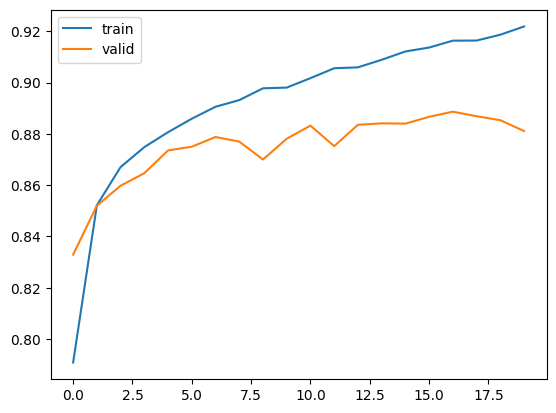

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_history(history):
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='valid')
    plt.legend()
    
show_history(history)

#학습을 많이 할수록 train 정확도와 valid 정확도의 gap은 벌어질 수 밖에 없다. 자연스러운 현상이다.

In [33]:
# 테스트 데이터 세트로 모델 성능 검증
model.evaluate(test_images, test_oh_labels, batch_size=32, verbose=1)

#Result
#[0.6657008528709412, 0.8776999711990356]
#손실률은 0.66이고 모델 정확도는 87.76%이다.

111/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8801 - loss: 0.3378

W0000 00:00:1718098313.276189     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8756 - loss: 0.3546


[0.35885465145111084, 0.8751000165939331]

### Callback 

#### ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
* 특정 조건에 맞춰서 모델을 파일로 저장(중간중간에 저장하는 것이 좋다)
 - 학습 중에 메모리 부족 등으로 다운되면 처음부터 다시 학습을 시켜야 한다.
 - 처음에는 오래걸리지만 중간에 저장해두면 나중에 시간을 단축시킬 수 있다.
* filepath: filepath는 (on_epoch_end에서 전달되는) epoch의 값과 logs의 키로 채워진 이름 형식 옵션을 가질 수 있음.
예를 들어 filepath가 weights.{epoch:02d}-{val_loss:.2f}.hdf5라면, 파일 이름에 세대 번호와 검증 손실을 넣어 모델의 체크포인트가 저장 
* monitor: 모니터할 지표(loss 또는 평가 지표) (학습데이터에는 하지 않는다.-오버피팅 문제 때문)
* save_best_only: 가장 좋은 성능을 나타내는 모델만 저장할 여부
* save_weights_only: Weights만 저장할 지 여부 (가급적 true로 저장하는게 좋다.)
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 자동으로 유추.
* min이면 min max면 max 확실하게 지정하는 것이 좋다.

In [ ]:
!pwd

In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# TF 버전업 변경 사항
# ModelCheckpoint의 save_weights_only=True 시 checkpoint 모델 파일명은 .weights.h5로 끝나는 형태가 되어야 함. False시에는 .keras로 끝나야 함. 
#  period는 save_freq로 변경됨. save_freq는 "epoch" 또는 정수값이 올 수 있는데, 정수값의 경우 epoch가 아니라 학습 batch 반복 횟수이며 적용시 오류 위험 
mcp_cb = ModelCheckpoint(filepath='/kaggle/working/checkpoint.{epoch:02d}-{val_loss:.2f}.weights.h5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', save_freq="epoch", verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=10, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb])

Epoch 1/10
 91/399 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5498 - loss: 1.4059

W0000 00:00:1718099780.503758     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7085 - loss: 0.8879

W0000 00:00:1718099781.785073     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718099782.265666     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update



Epoch 1: val_loss improved from inf to 0.47742, saving model to /kaggle/working/checkpoint.01-0.48.weights.h5
399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7087 - loss: 0.8873 - val_accuracy: 0.8303 - val_loss: 0.4774
Epoch 2/10
 60/399 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8387 - loss: 0.4576

W0000 00:00:1718099782.602627     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


396/399 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8483 - loss: 0.4363
Epoch 2: val_loss improved from 0.47742 to 0.41726, saving model to /kaggle/working/checkpoint.02-0.42.weights.h5
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8483 - loss: 0.4361 - val_accuracy: 0.8522 - val_loss: 0.4173
Epoch 3/10
397/399 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8645 - loss: 0.3866
Epoch 3: val_loss improved from 0.41726 to 0.38741, saving model to /kaggle/working/checkpoint.03-0.39.weights.h5
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8645 - loss: 0.3866 - val_accuracy: 0.8593 - val_loss: 0.3874
Epoch 4/10
376/399 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8725 - loss: 0.3619
Epoch 4: val_loss improved from 0.38741 to 0.37760, saving model to /kaggle/working/checkpoint.04-0.38.weights.h5
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8724 - loss: 0.3618 - val_accuracy: 0.8633 - val_loss: 0.3776
Epoch 5/10
396/399 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accura

In [43]:
!ls -lia
!rm -rf weight*
!ls -lia


total 12
   131078 drwxr-xr-x 3 root root 4096 Jun 11 09:39 .
322054256 drwxr-xr-x 5 root root 4096 Jun 11 06:25 ..
   131079 drwxr-xr-x 2 root root 4096 Jun 11 06:25 .virtual_documents
total 12
   131078 drwxr-xr-x 3 root root 4096 Jun 11 09:39 .
322054256 drwxr-xr-x 5 root root 4096 Jun 11 06:25 ..
   131079 drwxr-xr-x 2 root root 4096 Jun 11 06:25 .virtual_documents


#### ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0)
* 특정 epochs 횟수동안 성능이 개선 되지 않을 시 Learning rate를 동적으로 감소 시킴 
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* factor: 학습 속도를 줄일 인수. new_lr = lr * factor 
* patience: Learing Rate를 줄이기 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [48]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[rlr_cb])

Epoch 1/30
 91/399 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5778 - loss: 1.3209

W0000 00:00:1718099799.921484     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7238 - loss: 0.8368

W0000 00:00:1718099801.201188     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718099802.042098     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7240 - loss: 0.8362 - val_accuracy: 0.8431 - val_loss: 0.4432 - learning_rate: 0.0010
Epoch 2/30
 91/399 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8522 - loss: 0.4256

W0000 00:00:1718099802.368364     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8523 - loss: 0.4171 - val_accuracy: 0.8572 - val_loss: 0.3958 - learning_rate: 0.0010
Epoch 3/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8657 - loss: 0.3727 - val_accuracy: 0.8631 - val_loss: 0.3751 - learning_rate: 0.0010
Epoch 4/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8750 - loss: 0.3506 - val_accuracy: 0.8584 - val_loss: 0.3849 - learning_rate: 0.0010
Epoch 5/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8828 - loss: 0.3254 - val_accuracy: 0.8733 - val_loss: 0.3416 - learning_rate: 0.0010
Epoch 6/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8897 - loss: 0.3008 - val_accuracy: 0.8751 - val_loss: 0.3438 - learning_rate: 0.0010
Epoch 7/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8921 - loss: 0.2947 - val_accuracy: 0.8803 - val_loss: 0.3262 - learning_rate: 0.0010
Epoch 8/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8972 - loss: 0.2813 - val_accurac

#### EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
* 특정 epochs 동안 성능이 개선되지 않을 시 학습을 조기에 중단
* monitor: 모니터할 지표(loss 또는 평가 지표) 
* patience: Early Stopping 적용 전에 monitor할 epochs 횟수. 
* mode: {auto, min, max} 중 하나. monitor 지표가 감소해야 좋을 경우 min, 증가해야 좋을 경우 max, auto는 monitor 이름에서 유추. 

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

ely_cb = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=30, validation_data=(val_images, val_oh_labels),
                   callbacks=[ely_cb])

Epoch 1/30
 92/399 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5581 - loss: 1.3196

W0000 00:00:1718099829.194466     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7134 - loss: 0.8533

W0000 00:00:1718099830.468220     133 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718099830.939440     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7136 - loss: 0.8527 - val_accuracy: 0.8407 - val_loss: 0.4527
Epoch 2/30
 92/399 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8463 - loss: 0.4338

W0000 00:00:1718099831.271164     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8488 - loss: 0.4291 - val_accuracy: 0.8543 - val_loss: 0.4056
Epoch 3/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8678 - loss: 0.3754 - val_accuracy: 0.8604 - val_loss: 0.3846
Epoch 4/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8717 - loss: 0.3537 - val_accuracy: 0.8701 - val_loss: 0.3527
Epoch 5/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8813 - loss: 0.3300 - val_accuracy: 0.8729 - val_loss: 0.3467
Epoch 6/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8850 - loss: 0.3168 - val_accuracy: 0.8681 - val_loss: 0.3628
Epoch 7/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8916 - loss: 0.2950 - val_accuracy: 0.8816 - val_loss: 0.3275
Epoch 8/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8946 - loss: 0.2890 - val_accuracy: 0.8751 - val_loss: 0.3475
Epoch 9/30
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8977 - loss: 0.2799 - val_accuracy: 0.8744 - val_

In [ ]:
!rm weigh*

In [50]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

model = create_model()
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# TF 버전업 변경 사항
# ModelCheckpoint의 save_weights_only=True 시 checkpoint 모델 파일명은 .weights.h5로 끝나는 형태가 되어야 함. False시에는 .keras로 끝나야 함. 
#  period는 save_freq로 변경됨. save_freq는 "epoch" 또는 정수값이 올 수 있는데, 정수값의 경우 epoch가 아니라 학습 batch 반복 횟수이며 적용시 오류 위험 
mcp_cb = ModelCheckpoint(filepath='/kaggle/working/checkpoint.{epoch:02d}-{val_loss:.2f}.weights.h5', monitor='val_loss', 
                         save_best_only=True, save_weights_only=True, mode='min', save_freq="epoch", verbose=0)
rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=5, mode='min', verbose=1)
ely_cb = EarlyStopping(monitor='val_loss', patience=7, mode='min', verbose=1)

history = model.fit(x=tr_images, y=tr_oh_labels, batch_size=128, epochs=40, validation_data=(val_images, val_oh_labels),
                   callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/40
 87/399 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5195 - loss: 1.4277

W0000 00:00:1718099852.374000     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7013 - loss: 0.8871

W0000 00:00:1718099853.685457     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1718099854.162389     134 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7016 - loss: 0.8864 - val_accuracy: 0.8258 - val_loss: 0.4804 - learning_rate: 0.0010
Epoch 2/40
 58/399 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8444 - loss: 0.4545

W0000 00:00:1718099854.509551     132 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8503 - loss: 0.4307 - val_accuracy: 0.8479 - val_loss: 0.4184 - learning_rate: 0.0010
Epoch 3/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8642 - loss: 0.3749 - val_accuracy: 0.8638 - val_loss: 0.3831 - learning_rate: 0.0010
Epoch 4/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8739 - loss: 0.3517 - val_accuracy: 0.8708 - val_loss: 0.3595 - learning_rate: 0.0010
Epoch 5/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8817 - loss: 0.3276 - val_accuracy: 0.8700 - val_loss: 0.3668 - learning_rate: 0.0010
Epoch 6/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8871 - loss: 0.3136 - val_accuracy: 0.8668 - val_loss: 0.3673 - learning_rate: 0.0010
Epoch 7/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8910 - loss: 0.2989 - val_accuracy: 0.8818 - val_loss: 0.3329 - learning_rate: 0.0010
Epoch 8/40
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8978 - loss: 0.2850 - val_accurac

In [ ]:
!ls -lia